# **Online Retail Sales Analysis**

## Objectives

The objective of this notebook is to perform an analysis of online retail sales data. The notebook will cover the following tasks:

1. ETL Process:
    - Import necessary libraries for data manipulation and visualization.
    - Extract the dataset from an online source.
    - Describe the dataset and identify potential issues.

2. Data Pre-processing and Feature Engineering:
    - Filter the data for the United Kingdom.
    - Remove missing and invalid values.
    - Truncate the dataset to a representative sample.
    - Perform feature engineering to standardize the name column.

3. Data Analysis and Visualisation:
    - Analyze revenue distribution across different countries.
    - Explore revenue trends by year, month, day, and hour.
    - Calculate revenue per customer.

4. Final Dataset:
    - Generate final cleaned and processed dataset for further analysis.

## Inputs

- Online retail sales dataset.

## Outputs

- Aggregated revenue data by year, month, day, and hour.
- Revenue data for each customer.
- Final cleaned and processed dataset.

## Additional Comments

- The notebook assumes that the dataset is stored in a specific file path.
- The notebook will generate multiple output files for further analysis.
- The notebook focuses on the analysis of online retail sales data for the United Kingdom.

## CSV's Generated
- `revenue_by_year.csv`: Aggregated revenue data by year
- `revenue_by_month.csv`: Aggregated revenue data by month
- `revenue_by_day.csv`: Aggregated revenue data by day
- `revenue_by_hour.csv`: Aggregated revenue data by hour
- `revenue_per_customer.csv`: Revenue data for each customer
- `UK_online_retail_final.csv`: Final cleaned and processed dataset

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/Hackathon2/Online_Retail_Sales_Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/Hackathon2/Online_Retail_Sales_Analysis'

# Section 1: ETL Process

### 1.1 Extract: Importing Libraries, Extracting & Describing the Dataset

- This section involves importing libraries necessary for subsequent data analysis and visualisation tasks.

These libraries are imported to handle data manipulation (pandas, numpy), create visualisations (seaborn, matplotlib, plotly), and perform statistical analysis (scipy.stats).

In [4]:
# Importing necessary libraries for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as st

We opted to access the CSV file, Online Retail.csv, directly from a GitHub repository using the raw URL of the file. 

By using this method, the CSV file is fetched directly from the GitHub repository without needing to download it manually, making the process efficient.

In [5]:
# Storing the url of the dataset and storing it in a DataFrame
url = "https://raw.githubusercontent.com/bvhadra/Online_Retail_Sales_Analysis/refs/heads/main/Online%20Retail.csv"
df = pd.read_csv(url) 

In [6]:
# Display the first few rows of the DataFrame to confirm successful import
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [7]:
# Display the last few rows of the DataFrame to confirm successful import
print(df.tail())  

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID Country  
541904  2011-12-09 12:50:00       0.85       12680  France  
541905  2011-12-09 12:50:00       2.10       12680  France  
541906  2011-12-09 12:50:00       4.15       12680  France  
541907  2011-12-09 12:50:00       4.15       12680  France  
541908  2011-12-09 12:50:00       4.95       12680  France  


We then used the `df.describe()` function to generate a summary of key statistics for the numerical columns, helping us understand the data's distribution and identify potential outliers.

In [8]:
# Generates a summary of statistics (count, mean, std, min, max, etc.) for numerical columns in the DataFrame.
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


#### Findings:

**Count**: Both **Quantity** and **UnitPrice** have 500k+ non-null entries, indicating a large dataset. Given our technical limitations, we will need to truncate this data.

1. **Mean**: The average **Quantity** is 9.55, and the average **UnitPrice** is 4.61, providing insight into typical values for these columns.

2. **Standard Deviation**: The standard deviations (218.08 for **Quantity** and 96.76 for **UnitPrice**) show significant variability in both columns, suggesting that the data includes a wide spread of values.

**Min/Max**: The extreme values are notable:
1. The **Quantity** column includes a minimum of **-80,995** and a maximum of **80,995**, with negative quantities being particularly concerning.

2. Similarly, the **UnitPrice** has a negative minimum of **-11,062.06** and a maximum of **38,970**, indicating the presence of abnormal negative values for prices.

We started by inspecting the counts of the null/not-null values in the columns using `df.count()` and `df.isna()` respectively.

In [9]:
# Display the count of non null values in each column
print("\nCount of non-NA values in each column:")
print(df.count())


Count of non-NA values in each column:
InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     541909
Country        541909
dtype: int64


In [10]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isna().sum())


Missing values in each column:
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


The dataset has no missing values in most columns, except for **Description**, which contains 1,454 missing entries. 


#### Next Steps:

Following the extraction stage, we will be addressing the following key issues:

1. **Negative Values**: We need to look into the negative values found in both **Quantity** and **UnitPrice**, especially the extreme ones, as they could be errors or invalid entries. These might be caused by mistakes in data entry, returns, or system glitches.

2. **Clean the Data**: We will remove or correct the negative values in both columns, making sure only valid positive numbers are used in the analysis.

3. **Outlier Detection**: We’ll also need to deal with the extreme outliers in **Quantity** and **UnitPrice**. 

4. **Feature Engineering**: We will also perform feature engineering to ensure that the name column is properly standardised, especially since some items have the same name but come in different colours (e.g., "WHITE HANGING HEART T-LIGHT HOLDER" in different colorus). This will help avoid confusion and ensure consistency.


### 1.2 Transform: Data pre-processing & Feature Engineering

- This section involves cleaning the data, removing missing and invalid values. It also includes feature engineering and truncation.

#### 1.2.1 Filtering the data for the UK

Following the request from our stakeholders, we will focus exclusively on the United Kingdom (UK) for the analysis.

First, we want to confirm that the United Kingdom does not have any alternate names in the data set.

In [11]:
# Check unique values in the Country column
unique_countries = df['Country'].unique()
print("Unique values in 'Country' column:", unique_countries)

Unique values in 'Country' column: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


Before we continue, lets have a quick look at how the total revenue is distributed across the globe

In [12]:
# Drop rows with missing values
df_global_cleaned = df.dropna()

# Calculate the total revenue
df_global_cleaned['Revenue'] = df_global_cleaned['Quantity'] * df_global_cleaned['UnitPrice']
total_revenue = df_global_cleaned['Revenue'].sum()

# Group by country and calculate the total revenue for each country
revenue_by_country = df_global_cleaned.groupby('Country')['Revenue'].sum()

# Calculate the percentage of revenue by country
percentage_revenue_by_country = (revenue_by_country / total_revenue) * 100

# Create a new DataFrame with the percentage of revenue by country
percentage_revenue_df = percentage_revenue_by_country.reset_index()
percentage_revenue_df.columns = ['Country', 'Percentage of Revenue']

# Display the new DataFrame
print(percentage_revenue_df)

                 Country  Percentage of Revenue
0              Australia               1.406246
1                Austria               0.104171
2                Bahrain               0.005626
3                Belgium               0.419697
4                 Brazil               0.011732
5                 Canada               0.037613
6        Channel Islands               0.206061
7                 Cyprus               0.132813
8         Czech Republic               0.007260
9                Denmark               0.192538
10                  EIRE               2.700899
11    European Community               0.013252
12               Finland               0.229045
13                France               2.025123
14               Germany               2.274353
15                Greece               0.048324
16             Hong Kong               0.103788
17               Iceland               0.044215
18                Israel               0.081125
19                 Italy               0

/var/folders/kl/hs44b81s0xj4q9bdfyngwwbm0000gn/T/ipykernel_55044/4110619047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_cleaned['Revenue'] = df_global_cleaned['Quantity'] * df_global_cleaned['UnitPrice']


/var/folders/kl/hs44b81s0xj4q9bdfyngwwbm0000gn/T/ipykernel_55044/2006634559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage of Revenue', y='Country', data=percentage_revenue_df, palette='viridis')


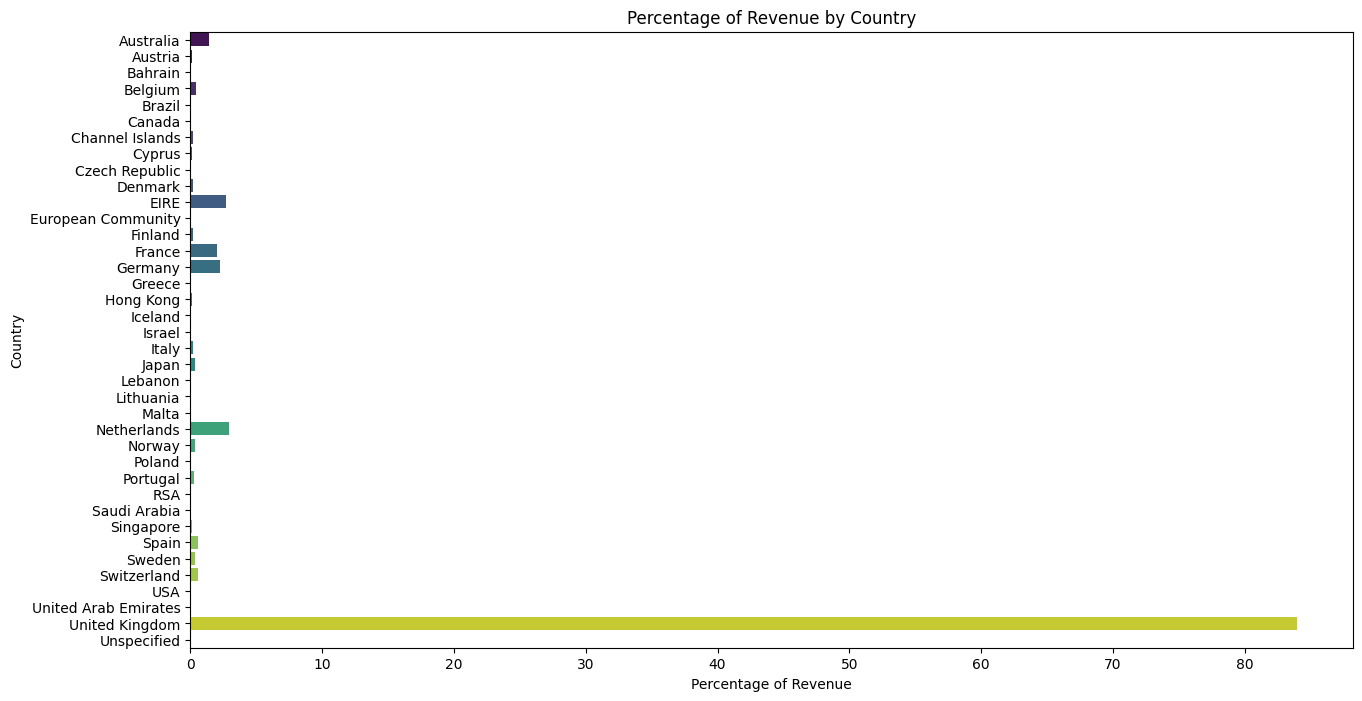

In [13]:
# Plot the percentage of revenue by country using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Percentage of Revenue', y='Country', data=percentage_revenue_df, palette='viridis')
plt.title('Percentage of Revenue by Country')
plt.xlabel('Percentage of Revenue')
plt.ylabel('Country')
plt.show() 


In [14]:
# Save the percentage of revenue by country to a CSV file
percentage_revenue_df.to_csv('percentage_by_country.csv', index=False)

Having confirmed this, we will now filter the data accordingly.

In [15]:

# Filter the dataset to include only the United Kingdom
df_uk = df[df['Country'] == 'United Kingdom']

# Verify the filter by checking the unique countries again
unique_countries_after_filter = df_uk['Country'].unique()
print("Unique values in 'Country' column after filtering:", unique_countries_after_filter)


Unique values in 'Country' column after filtering: ['United Kingdom']


We will now begin to inspect the now filtered data.

In [16]:
# Display the first few rows of the DataFrame to get an overview.
print("First few rows of the data:")
print(df_uk.head())

First few rows of the data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [17]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
df_uk[['Quantity', 'UnitPrice']].describe()


Summary statistics for numerical columns:


,Quantity,UnitPrice
count,495478.000000,495478.000000
mean,8.605486,4.532422
std,227.588756,99.315438
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,38970.000000


#### 1.2.2 Removing Null Rows

In [18]:
# Display the count of non null values in each column
print("\nCount of non-NA values in each column:")
print(df_uk.count())


Count of non-NA values in each column:
InvoiceNo      495478
StockCode      495478
Description    494024
Quantity       495478
InvoiceDate    495478
UnitPrice      495478
CustomerID     495478
Country        495478
dtype: int64


In [19]:
print("\nMissing values in each column:")
print(df_uk.isna().sum())


Missing values in each column:
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [20]:
# Remove rows with missing values
df_uk_cleaned = df_uk.dropna()

# Remove rows with non-negative values in Quantity or UnitPrice
df_uk_cleaned = df_uk_cleaned[(df_uk_cleaned['Quantity'] > 0) & (df_uk_cleaned['UnitPrice'] > 0)]

# Verify the shape after removal
print(f"Shape after cleaning: {df_uk_cleaned.shape}")

Shape after cleaning: (485123, 8)


In [21]:
# verify the removal of missing values
print("\nMissing values in each column:")
print(df_uk_cleaned.isna().sum())


Missing values in each column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [22]:
# Verify the removal of non-negative values
df_uk_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,485123.000000,485123.000000,485123.000000
mean,9.610738,3.849679,15480.904235
std,161.904143,34.677371,1367.795929
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14649.000000
50%,3.000000,2.100000,15287.000000
75%,10.000000,4.130000,16458.000000
max,80995.000000,13541.330000,18287.000000


#### 1.2.3 Truncating the dataset

In terms of technical feasibility, truncating the dataset was a necessary decision. The full filtered dataset for the UK subset contains upwards of 400,000 records.

This reduction in size will allow us to focus on a representative sample of the data and ensure that the analysis remains efficient, whilst aligning with the stakeholder requirements.

We define a function that takes dataframe and splits the date into months. Then it takes the first x values from each month. This way we can use it to visualise the various information such as revenue per month.

In [23]:
def get_first_n_rows_per_month(df, date_column, n=4000): 
    """
    Extracts the first n rows for each month from a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame.
        date_column: The name of the column containing the dates.
        n: The number of rows to extract per month (default: 400).

    Returns:
        A new Pandas DataFrame containing the extracted rows, or None if there's an issue.
    """

    try:
        # 1. Ensure the date column is datetime objects
        df[date_column] = pd.to_datetime(df[date_column])

        # 2. Set the date column as the index (optional but often helpful)
        df = df.set_index(date_column)

        # 3. Sort by date (important for getting the "first" rows)
        df = df.sort_index()

        # 4. Group by year and month
        grouped = df.groupby([df.index.year, df.index.month])

        # 5. Extract the first n rows from each group
        result = []
        for name, group in grouped:
            result.append(group.head(n))  # Now we're appending the entire group (rows)
            
        return pd.concat(result)

    except (KeyError, TypeError) as e:  # Handle potential errors
        print(f"Error: {e}")
        return None



df_truncated_cleaned = get_first_n_rows_per_month(df_uk_cleaned, 'InvoiceDate', n=400) # Replace 'date' with your actual column name.

df_truncated_cleaned = df_truncated_cleaned.reset_index() # Reset the index to have access to Date column

if df_truncated_cleaned is not None:
    print(extracted_rows)
    # You can now work with the 'extracted_rows' DataFrame
    # For example, save it to a CSV file:
    # extracted_rows.to_csv("extracted_data.csv")

NameError: name 'extracted_rows' is not defined

#### 1.2.4 Outliers?

We will check for any outliers and see if data needs further transformation

#### 1.2.5 Feature engineering

- Break down the invoice date into year, month, day, and hour.
- Create a new column for the total revenue per item purchase.
- Create new columns for revenue per year, month, and day.
- Categorise items into different categories.

We will change the invoice date into a date and time format. This will make it easier to see patterns in when transactions happen. For example, we can see if there are certain times of day or days of the week when we have more transactions. This information can be used to offer discounts or promotions to customers at those times, which could help the company generate more revenue.

We will also break down the time into hours instead of hours & minutes.This will make it easier to analyse the data and see when our busiest times are.

In [ ]:
# Breaking Invoice Date into multiple columns

# We need to ensure the column is treated as a datetime format as opposed to a string
df_truncated_cleaned['InvoiceDate'] = pd.to_datetime(df_truncated_cleaned['InvoiceDate'])

# Extract the year, month, day, hour from the 'InvoiceDate' column
df_truncated_cleaned['Year'] = df_truncated_cleaned['InvoiceDate'].dt.year
df_truncated_cleaned['Month'] = df_truncated_cleaned['InvoiceDate'].dt.month
df_truncated_cleaned['Day'] = df_truncated_cleaned['InvoiceDate'].dt.day
df_truncated_cleaned['Hour'] = df_truncated_cleaned['InvoiceDate'].dt.hour

# Display the first few rows of the DataFrame to confirm the changes
print(df_truncated_cleaned[['InvoiceDate', 'Year', 'Month', 'Day', 'Hour']].head())

          InvoiceDate  Year  Month  Day  Hour
0 2010-12-01 08:26:00  2010     12    1     8
1 2010-12-01 08:26:00  2010     12    1     8
2 2010-12-01 08:26:00  2010     12    1     8
3 2010-12-01 08:26:00  2010     12    1     8
4 2010-12-01 08:26:00  2010     12    1     8


We utilise the `to_datetime()` function to ensure the type is set as a datetime variable, rather than a string variable.

#### 1.2.5 Calculating Aggregated Revenues

In [ ]:
# Calculate the total amount spent per transaction and store in new col
df_truncated_cleaned['TotalAmount'] = df_truncated_cleaned['Quantity'] * df_truncated_cleaned['UnitPrice']

Now that we have successfully calculcated revenue per transaction, we can aggregate by year, month and day and store each in a csv.

In [ ]:
unique_year = df_truncated_cleaned['Year'].nunique()
print(f"Number of unique years: {unique_year}")

unique_months = df_truncated_cleaned['Month'].nunique()
print(f"Number of unique months: {unique_months}")

unique_days = df_truncated_cleaned['Day'].nunique()
print(f"Number of unique days: {unique_days}")

unique_times = df_truncated_cleaned['Hour'].nunique()
print(f"Number of unique hours: {unique_times}")

Number of unique years: 2
Number of unique months: 12
Number of unique days: 3
Number of unique hours: 8


In [ ]:
# Aggregate revenue by year, month, day, and hour
revenue_by_year = df_truncated_cleaned.groupby('Year')['TotalAmount'].sum().reset_index()
revenue_by_month = df_truncated_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
revenue_by_day = df_truncated_cleaned.groupby(['Year', 'Month', 'Day'])['TotalAmount'].sum().reset_index()
revenue_by_hour = df_truncated_cleaned.groupby(['Year', 'Month', 'Day', 'Hour'])['TotalAmount'].sum().reset_index()

# Rename the 'TotalAmount' column to the desired naming convention
revenue_by_year = revenue_by_year.rename(columns={'TotalAmount': 'revenue_per_year'})
revenue_by_month = revenue_by_month.rename(columns={'TotalAmount': 'revenue_per_month'})
revenue_by_day = revenue_by_day.rename(columns={'TotalAmount': 'revenue_per_day'})
revenue_by_hour = revenue_by_hour.rename(columns={'TotalAmount': 'revenue_per_hour'})

# Round the revenue values to 2 decimal places
revenue_by_year['revenue_per_year'] = revenue_by_year['revenue_per_year'].round(2)
revenue_by_month['revenue_per_month'] = revenue_by_month['revenue_per_month'].round(2)
revenue_by_day['revenue_per_day'] = revenue_by_day['revenue_per_day'].round(2)
revenue_by_hour['revenue_per_hour'] = revenue_by_hour['revenue_per_hour'].round(2)

# Export each aggregation to a separate CSV
revenue_by_year.to_csv('revenue_by_year.csv', index=False)
revenue_by_month.to_csv('revenue_by_month.csv', index=False)
revenue_by_day.to_csv('revenue_by_day.csv', index=False)
revenue_by_hour.to_csv('revenue_by_hour.csv', index=False)

In [ ]:
revenue_by_year.head()

,Year,revenue_per_year
0,2010,14790.73
1,2011,89681.33


In [ ]:
revenue_by_month.head(13)

,Year,Month,revenue_per_month
0,2010,12,14790.73
1,2011,1,5971.48
2,2011,2,10390.71
3,2011,3,6982.52
4,2011,4,6237.04
5,2011,5,5260.02
6,2011,6,6366.96
7,2011,7,5652.19
8,2011,8,7073.54
9,2011,9,10781.34


In [ ]:
revenue_by_day.head()

,Year,Month,Day,revenue_per_day
0,2010,12,1,14790.73
1,2011,1,4,5971.48
2,2011,2,1,10390.71
3,2011,3,1,6982.52
4,2011,4,1,6237.04


In [ ]:
revenue_by_hour.head()

,Year,Month,Day,Hour,revenue_per_hour
0,2010,12,1,8,527.95
1,2010,12,1,9,7356.39
2,2010,12,1,10,4877.56
3,2010,12,1,11,2028.83
4,2011,1,4,10,1727.92


#### 1.2.6 Top 10 customers

We are now interested in calculating revenue per each individual customer so that we can assess the top 10 customers.

We will be saving this revenue per customer data in a new CSV.

In [ ]:
unique_customers = df_truncated_cleaned['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")


Number of unique customers: 231


In [ ]:
revenue_per_customer = df_truncated_cleaned.groupby('CustomerID')['TotalAmount'].sum().reset_index()
revenue_per_customer.rename(columns={'TotalAmount': 'Revenue'}, inplace=True)

# Display the first few rows of the DataFrame 
print("First few rows of revenue per customer:")
print(revenue_per_customer.head())
print("\n")

# top 10 customers by revenue
top_10_customers = revenue_per_customer.sort_values(by='Revenue', ascending=False).head(10)
print("Top 10 customers by revenue:")
print(top_10_customers)

First few rows of revenue per customer:
   CustomerID  Revenue
0       12748     2.10
1       12749  1896.13
2       12836   264.73
3       12841   116.09
4       12901   780.00


Top 10 customers by revenue:
     CustomerID  Revenue
201       17511  6272.62
136       16029  4334.42
13        13089  4313.84
108       15287  2359.34
50        13777  2251.51
95        15039  2031.34
54        13881  1974.84
1         12749  1896.13
110       15311  1840.04
214       17850  1499.34


In [ ]:
revenue_per_customer.to_csv('revenue_per_customer.csv', index=False)

NameError: name 'revenue_per_customer' is not defined

Having examined the CSV file we can see that the revenue values extend 2 decimal places, therefore we will need to truncate these down.

In [ ]:
revenue_per_customer = pd.read_csv('revenue_per_customer.csv')
revenue_per_customer['Revenue']=revenue_per_customer['Revenue'].round(2)
revenue_per_customer.to_csv('revenue_per_customer.csv', index=False)


#### 1.2.7 Creating category columns

In [ ]:
# Round off total amount values to 2 decimal places
df_truncated_cleaned['TotalAmount'] = df_truncated_cleaned['TotalAmount'].round(2)
#Save current DataFrame to a CSV file
df_truncated_cleaned.to_csv('online_retail_cleaned.csv', index=False)

We will utilise ChatGPT to apply a keyword-based categorisation upon the dataset we have. This will ensure more accurate categorisation and handle the large volume of records quickly and consistently. This will reduce human error in category selection and application, proving it to be more reliable compared to manual methods.

In [ ]:
url = "https://raw.githubusercontent.com/bvhadra/Online_Retail_Sales_Analysis/refs/heads/main/online_retail_categorized.csv"
categorised_df = pd.read_csv(url)

# View generated category list
categorised_df["Category"].unique()


array(['Home Decor', 'Drinkware', 'Heating & Warmth',
       'Storage & Organization', 'Other', 'Seasonal', 'Photo & Frames',
       'Accessories', 'Tableware', 'Gardening', 'Toys & Games',
       'Timepieces', 'Stationery'], dtype=object)

In [ ]:
# Category Counts
# Calculate the count of each category in the 'Category' column of the 'categorised_df' DataFrame
category_counts = categorised_df['Category'].value_counts()
print("Category Counts:")
print(category_counts)

#### 1.2.8 Categories & Revenue

In [ ]:
# In terms of items purchased
print("\nTop 10 categories by items purchased:")
top_10_categories = category_counts.sort_values(ascending=False).head(10)
print(top_10_categories)

print("\n")

# In terms of revenue generated
print("Top 10 categories by revenue:")
revenue_by_category = categorised_df.groupby('Category')['TotalAmount'].sum().reset_index()
top_10_revenue_categories = revenue_by_category.sort_values(by='TotalAmount', ascending=False).head(10)
print(top_10_revenue_categories)



Top 10 categories by items purchased:
Category
Other                     26581
Drinkware                  3461
Accessories                3375
Home Decor                 2860
Seasonal                   2634
Storage & Organization     2592
Heating & Warmth           1944
Stationery                 1418
Tableware                  1275
Gardening                  1160
Name: count, dtype: int64


Top 10 categories by revenue:
                  Category  TotalAmount
5                    Other    507229.88
3         Heating & Warmth     74786.31
4               Home Decor     68422.84
0              Accessories     62248.68
1                Drinkware     52585.97
9   Storage & Organization     51482.13
7                 Seasonal     39110.05
6           Photo & Frames     22442.31
10               Tableware     20860.83
2                Gardening     15125.57


#### 1.2.9 Subcategorising 'Other' Category

To address the records currently categorised as 'Other' we utilised generative AI once more to break down the Other category into subcategories to refine it.

Upon its analysis, it was found that no clear sub categories emerged. The records largely consisted of miscellaneous items, inlcuding products such as dust bins, garlands, cupcake cases, and other similar items. 

In future analysis, further refinement of product categories could be explored.

#### 1.3 Category Price Bins

To better understand the distribution of product prices in the dataset, we applied a price binning strategy to categorise the prodcuts into defined price ranges.

In [ ]:
# Define bins and labels for unit price
bins = [0, 10, 50, 100, 500, 1000, float('inf')]  # 6 bins for price ranges
labels = ['0-10', '11-50', '51-100', '101-500', '501-1000', '1000+']  # 6 labels to match the bins



# Bin prices and store in a new column
categorised_df['PriceRange'] = pd.cut(categorised_df['UnitPrice'], bins=bins, labels=labels, right=False)

# Count of each price range
price_range_counts = categorised_df['PriceRange'].value_counts()

print("Price Range Counts:")
print(price_range_counts)

Price Range Counts:
PriceRange
0-10        46364
11-50        2559
101-500        51
501-1000       29
51-100         14
1000+           2
Name: count, dtype: int64


In [ ]:
# Save the cleaned, categorised and price-binned DataFrame to a CSV file
categorised_df.to_csv('UK_online_retail_final.csv', index=False)

# Section 2 : VISUALISATIONS

To get a better understanding of the data we will make some graphs to draw some immediate insights. The graphs we have are:

- Monthly revenue
- Quantity sold by month
- Top 10 items sold over the 13 months
- Top 10 sellers over the 13 months


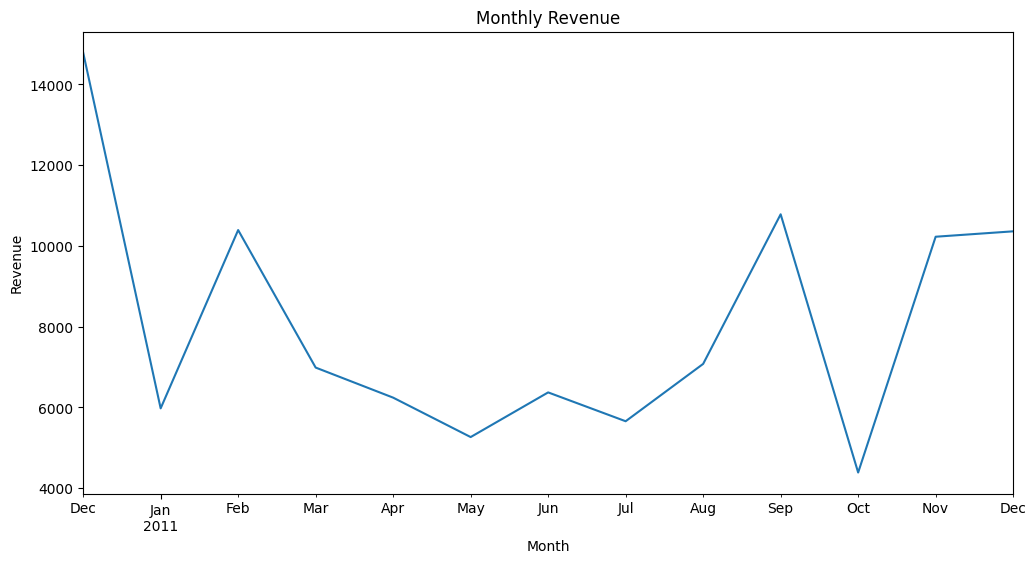

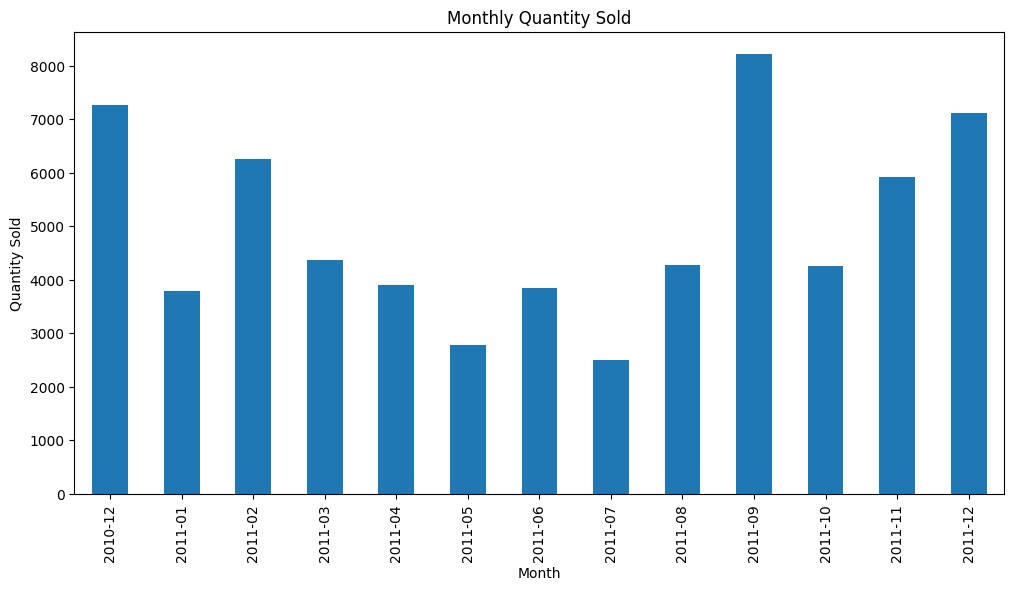

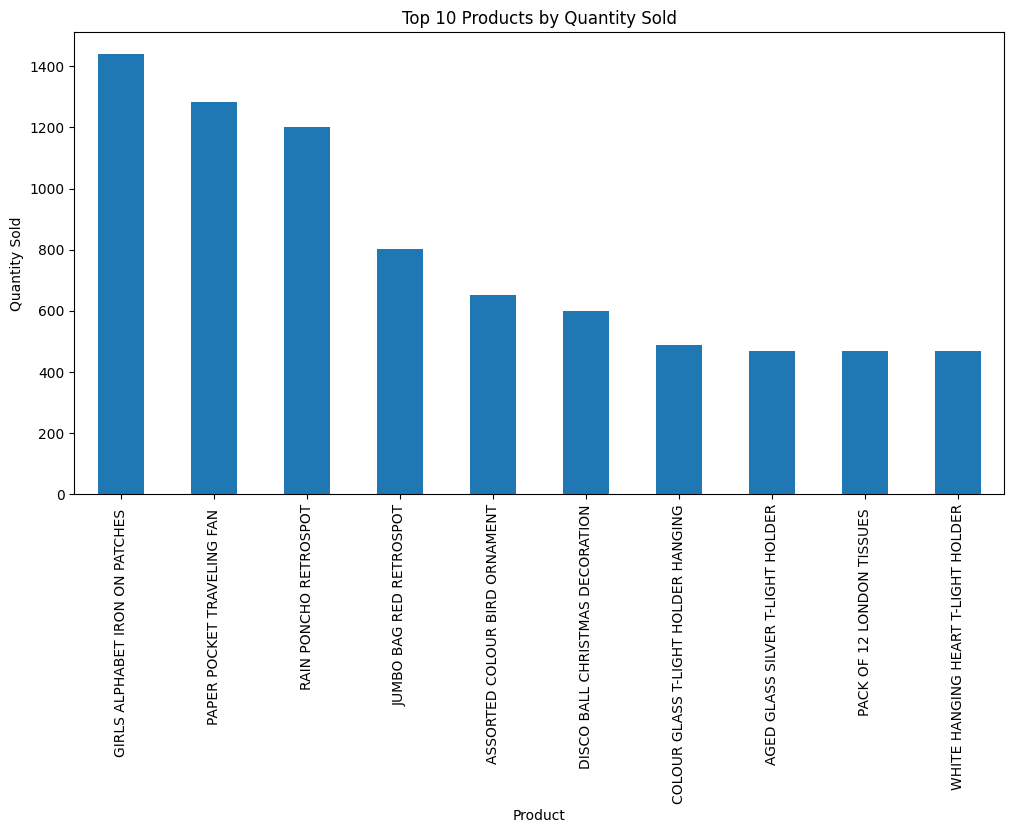

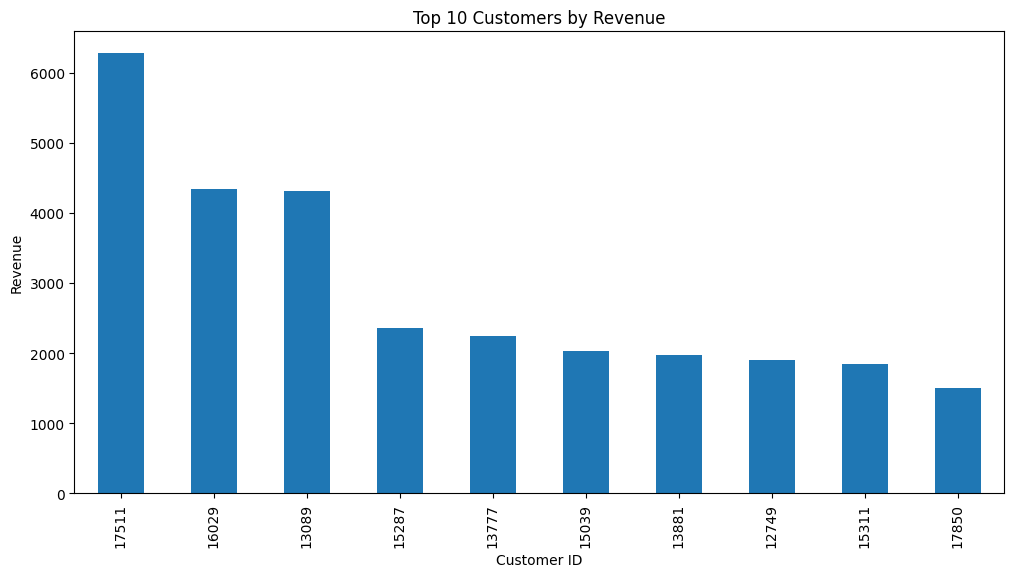

In [ ]:
# Calculate the revenue for each row
df_truncated_cleaned['Revenue'] = df_truncated_cleaned['Quantity'] * df_truncated_cleaned['UnitPrice']

# Group by month and calculate the total revenue for each month
monthly_revenue = df_truncated_cleaned.groupby(df_truncated_cleaned['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

# Plot the bar chart
monthly_revenue.plot(kind='line', figsize=(12, 6), title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# Monthly Quantity Sold
monthly_quantity = df_truncated_cleaned.groupby(df_truncated_cleaned['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_quantity.plot(kind='bar', figsize=(12, 6), title='Monthly Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()

# Top 10 Products by Quantity Sold
top_products = df_truncated_cleaned.groupby('Description')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

# Top 10 Customers by Revenue
top_customers = df_truncated_cleaned.groupby('CustomerID')['Revenue'].sum().nlargest(10)
top_customers.plot(kind='bar', figsize=(12, 6), title='Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.show()





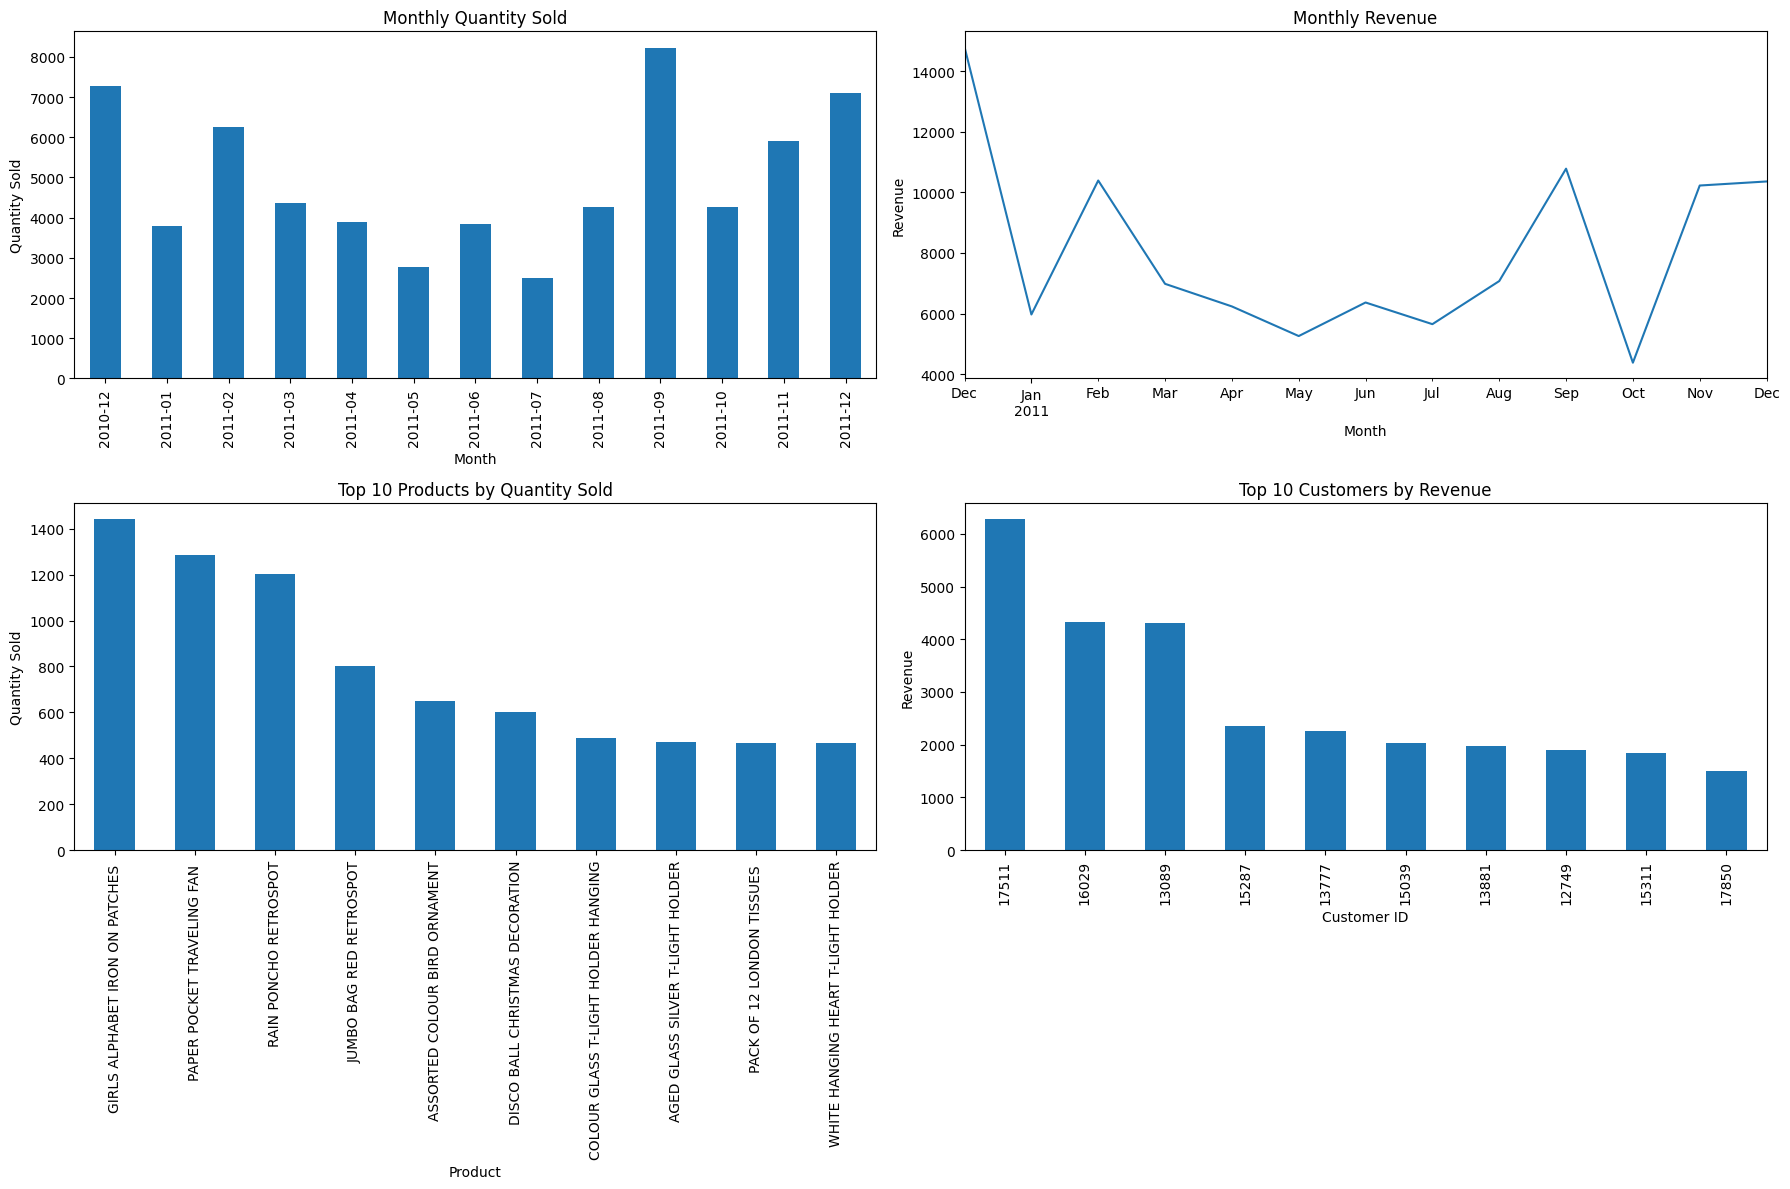

In [ ]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Monthly Quantity Sold
monthly_quantity = df_truncated_cleaned.groupby(df_truncated_cleaned['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_quantity.plot(kind='bar', ax=axes[0, 0], title='Monthly Quantity Sold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Quantity Sold')

# Monthly Revenue
df_truncated_cleaned['Revenue'] = df_truncated_cleaned['Quantity'] * df_truncated_cleaned['UnitPrice']
monthly_revenue = df_truncated_cleaned.groupby(df_truncated_cleaned['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
monthly_revenue.plot(kind='line', ax=axes[0, 1], title='Monthly Revenue')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Revenue')

# Top 10 Products by Quantity Sold
top_products = df_truncated_cleaned.groupby('Description')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', ax=axes[1, 0], title='Top 10 Products by Quantity Sold')
axes[1, 0].set_xlabel('Product')
axes[1, 0].set_ylabel('Quantity Sold')

# Top 10 Customers by Revenue
top_customers = df_truncated_cleaned.groupby('CustomerID')['Revenue'].sum().nlargest(10)
top_customers.plot(kind='bar', ax=axes[1, 1], title='Top 10 Customers by Revenue')
axes[1, 1].set_xlabel('Customer ID')
axes[1, 1].set_ylabel('Revenue')

# Adjust layout
plt.tight_layout()
plt.show()

## Further Analysis and Visualizations

### Top 5 Worst Performing Products

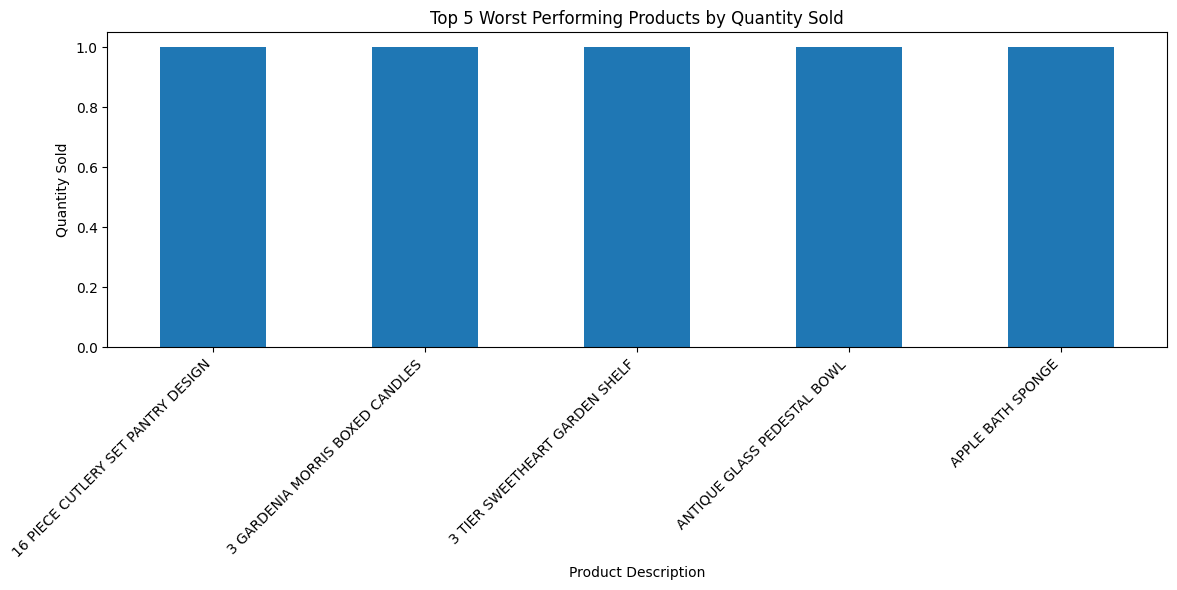

Top 5 Worst Performing Products by Quantity Sold:
Description
16 PIECE CUTLERY SET PANTRY DESIGN    1
3 GARDENIA MORRIS BOXED CANDLES       1
3 TIER SWEETHEART GARDEN SHELF        1
ANTIQUE GLASS PEDESTAL BOWL           1
APPLE BATH SPONGE                     1
Name: Quantity, dtype: int64


In [ ]:
# Top 5 Worst Performing Products by Quantity Sold
worst_products = df_truncated_cleaned.groupby('Description')['Quantity'].sum().nsmallest(5)

plt.figure(figsize=(12, 6))
worst_products.plot(kind='bar')
plt.title('Top 5 Worst Performing Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the results
print("Top 5 Worst Performing Products by Quantity Sold:")
print(worst_products)

### Least Revenue Generating Customers

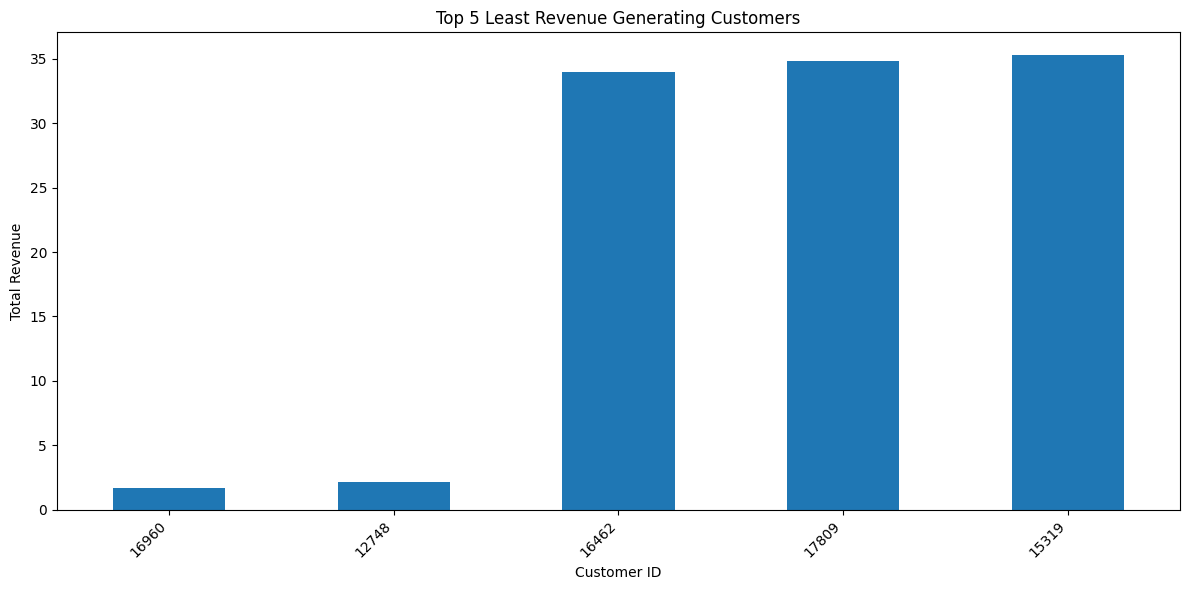

Top 5 Least Revenue Generating Customers:
CustomerID
16960     1.69
12748     2.10
16462    34.00
17809    34.80
15319    35.30
Name: TotalAmount, dtype: float64


In [ ]:
# Calculate TotalAmount if it doesn't exist
if 'TotalAmount' not in df_truncated_cleaned.columns:
    df_truncated_cleaned['TotalAmount'] = df_truncated_cleaned['Quantity'] * df_truncated_cleaned['UnitPrice']

# Top 5 Least Revenue Generating Customers
least_revenue_customers = df_truncated_cleaned.groupby('CustomerID')['TotalAmount'].sum().nsmallest(5)

plt.figure(figsize=(12, 6))
least_revenue_customers.plot(kind='bar')
plt.title('Top 5 Least Revenue Generating Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the results
print("Top 5 Least Revenue Generating Customers:")
print(least_revenue_customers)

### Product Categories by Revenue

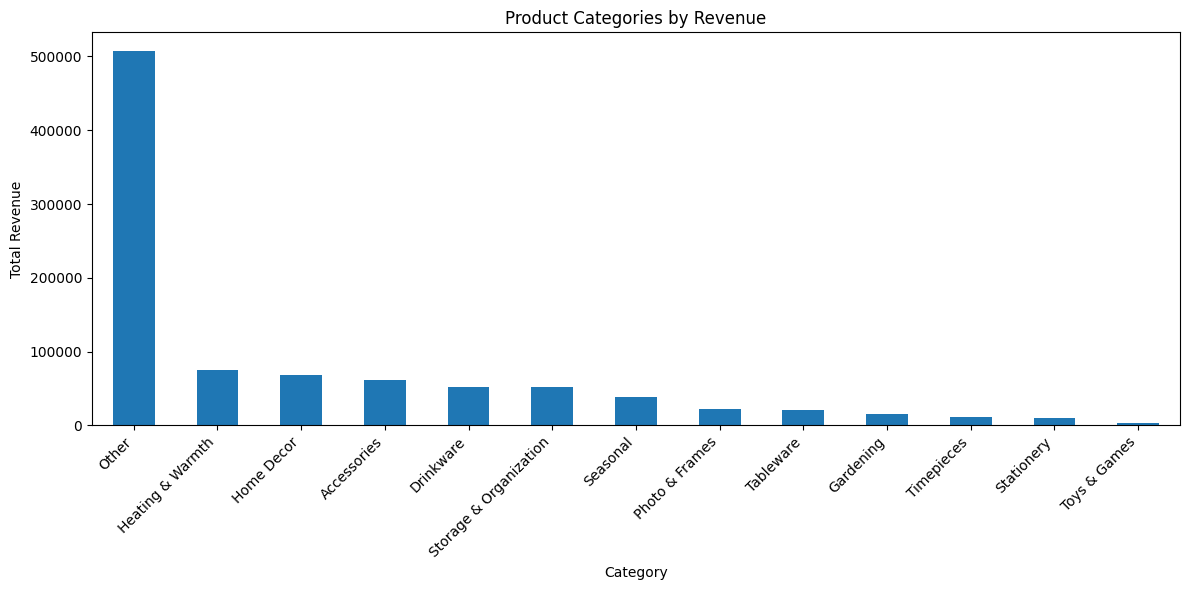

Product Categories by Revenue:
Category
Other                     507229.88
Heating & Warmth           74786.31
Home Decor                 68422.84
Accessories                62248.68
Drinkware                  52585.97
Storage & Organization     51482.13
Seasonal                   39110.05
Photo & Frames             22442.31
Tableware                  20860.83
Gardening                  15125.57
Timepieces                 10927.16
Stationery                 10276.54
Toys & Games                3753.34
Name: TotalAmount, dtype: float64


In [ ]:
# First, make sure the categorised DataFrame is loaded
categorised_df = pd.read_csv('UK_online_retail_final.csv')

# Product Categories by Revenue
category_revenue = categorised_df.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_revenue.plot(kind='bar')
plt.title('Product Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the results
print("Product Categories by Revenue:")
print(category_revenue)

### Sales Distribution by Hour of Day

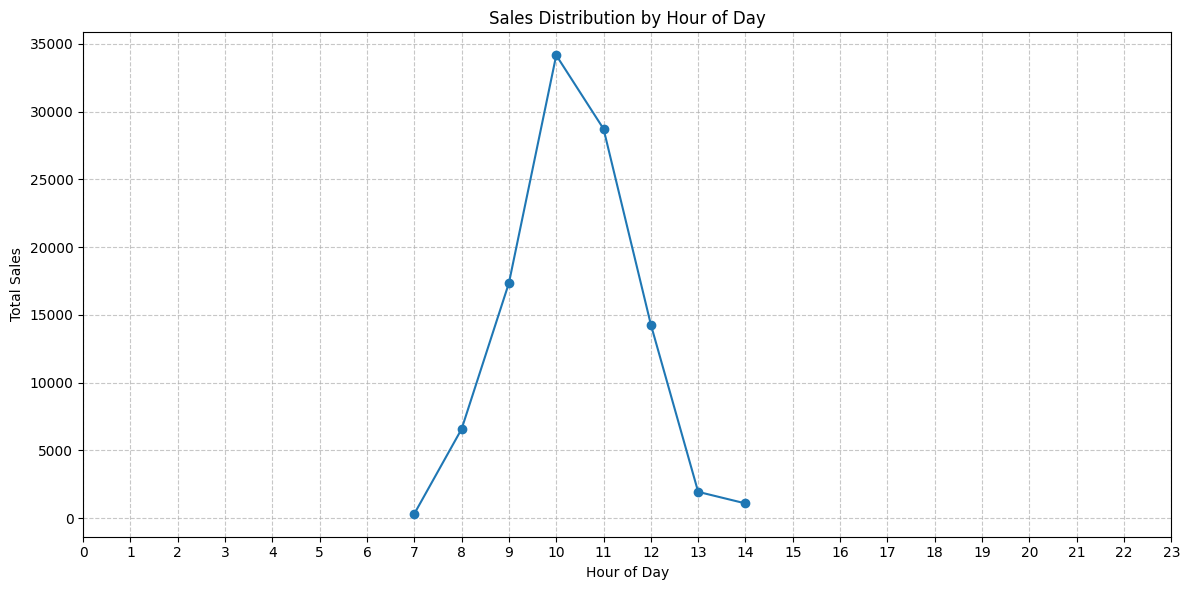

Sales Distribution by Hour of Day:
Hour
7       326.90
8      6582.97
9     17355.72
10    34155.34
11    28724.61
12    14287.75
13     1945.79
14     1092.98
Name: TotalAmount, dtype: float64


In [ ]:
# Ensure 'Hour' column exists
if 'Hour' not in df_truncated_cleaned.columns:
    df_truncated_cleaned['Hour'] = df_truncated_cleaned['InvoiceDate'].dt.hour

# Ensure 'TotalAmount' column exists
if 'TotalAmount' not in df_truncated_cleaned.columns:
    df_truncated_cleaned['TotalAmount'] = df_truncated_cleaned['Quantity'] * df_truncated_cleaned['UnitPrice']

# Sales Distribution by Hour of Day
hourly_sales = df_truncated_cleaned.groupby('Hour')['TotalAmount'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o')
plt.title('Sales Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the results
print("Sales Distribution by Hour of Day:")
print(hourly_sales)

### Top 10 Most Expensive Products

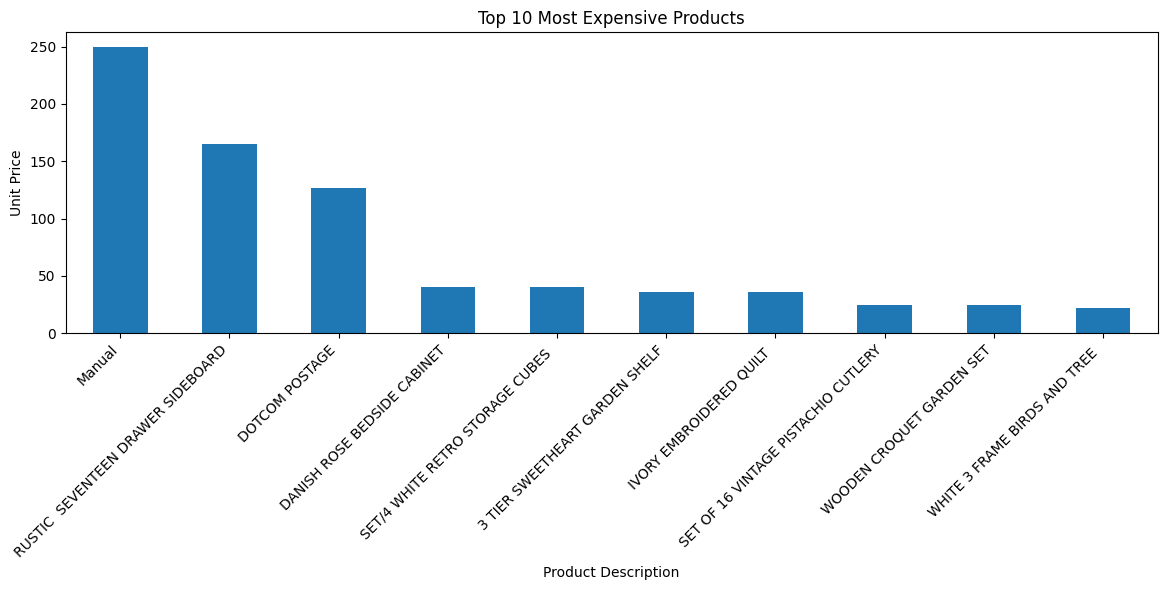

Top 10 Most Expensive Products:
Description
Manual                                 250.00
RUSTIC  SEVENTEEN DRAWER SIDEBOARD     165.00
DOTCOM POSTAGE                         126.54
DANISH ROSE BEDSIDE CABINET             39.95
SET/4 WHITE RETRO STORAGE CUBES         39.95
3 TIER SWEETHEART GARDEN SHELF          35.95
IVORY EMBROIDERED QUILT                 35.75
SET OF 16 VINTAGE PISTACHIO CUTLERY     24.96
WOODEN CROQUET GARDEN SET               24.96
WHITE 3 FRAME BIRDS AND TREE            21.95
Name: UnitPrice, dtype: float64


In [ ]:
# Top 10 Most Expensive Products
expensive_products = df_truncated_cleaned.groupby('Description')['UnitPrice'].max().nlargest(10)

plt.figure(figsize=(12, 6))
expensive_products.plot(kind='bar')
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Product Description')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the results
print("Top 10 Most Expensive Products:")
print(expensive_products)


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
